# Lab 04
## Sam Bacon - February 22, 2021
### Lab 04: Classification and KNN

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
 # Read in dataset and display 6 rows
 survey = pd.read_csv('cs1_survey.csv', index_col=0)
 survey.head(6)

,Textbook,Videos,Lecture,Discussion,Problems,Proactive,CodeExperience,MotivatedByFun,MotivatedByChallenge,MotivatedByGrades,MotivatedByJob,Grade
ID,,,,,,,,,,,,
1,3,4,3,1,2,4,1,4,3,4,4,D
2,2,3,5,4,3,5,1,4,4,4,4,B
3,4,5,5,3,5,3,1,5,4,5,5,C
4,1,5,3,4,3,1,1,4,3,1,3,F
5,4,3,3,2,2,4,2,5,4,5,5,B
6,2,3,4,3,4,3,1,4,4,4,3,D


Building the KNN Classifier

In [ ]:
# Creating 'X' numpy Array
X = survey[['Textbook', 'Videos', 'Lecture', 'Discussion', 'Problems', 'Proactive', 'CodeExperience', 'MotivatedByFun', 'MotivatedByChallenge', 'MotivatedByGrades', 'MotivatedByJob']].values
print('data:', X.shape)
# print(X)

data: (55, 11)


In [ ]:
# Creating 'y' Array
y = survey['Grade'].astype('category').cat.codes.values
print('\nlabels:', y.shape)
# y


labels: (55,)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


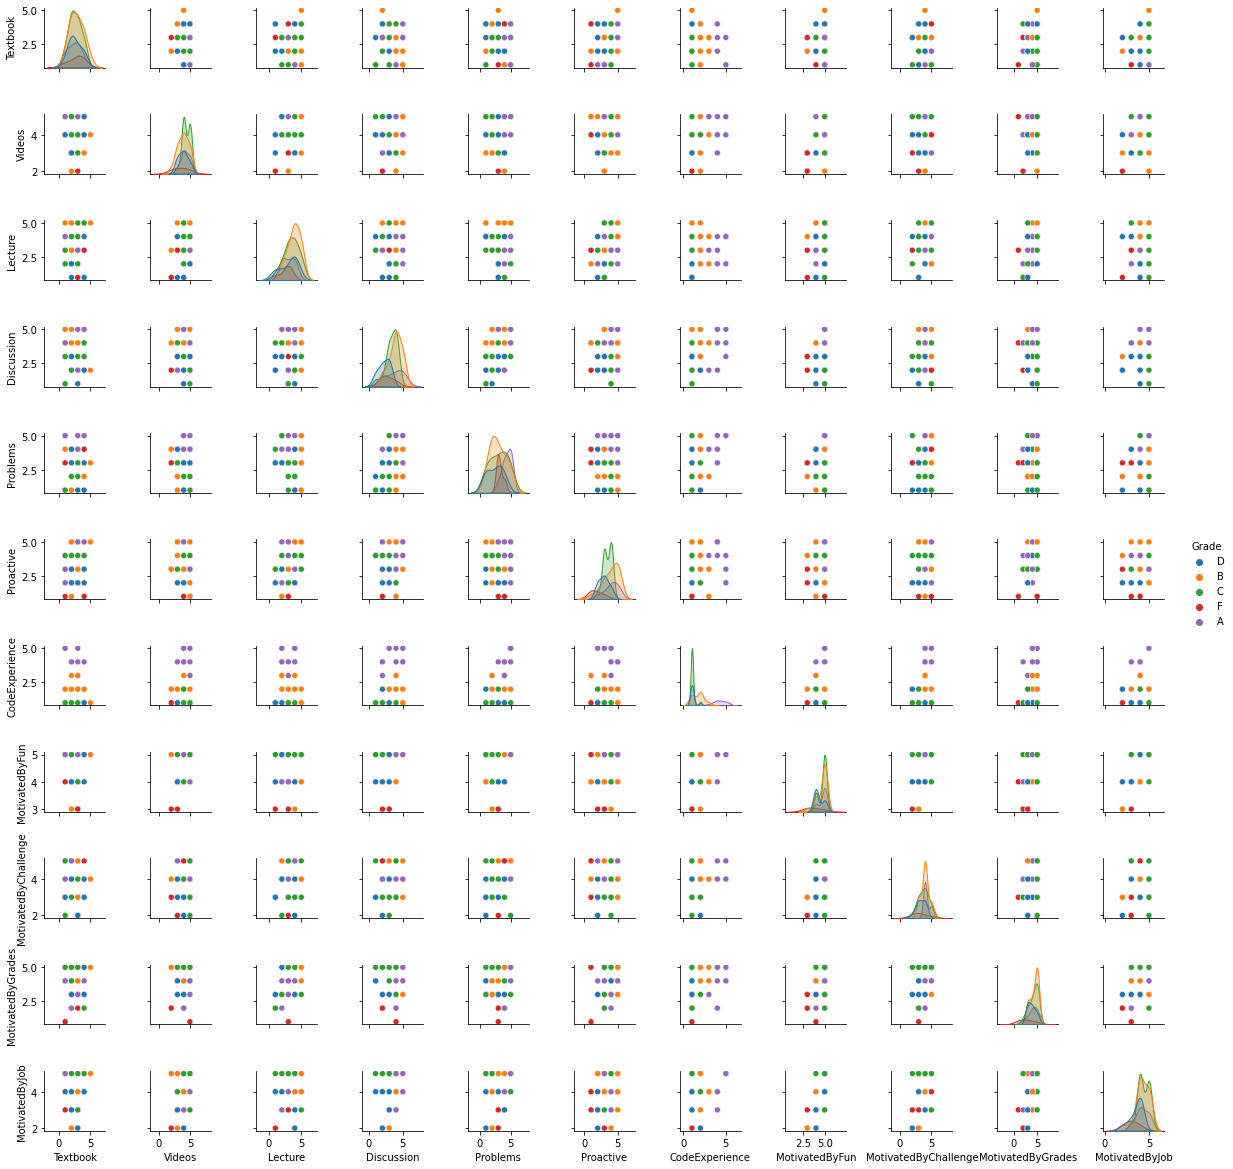

In [ ]:
# Visualizations...
import seaborn as sns;
sns.pairplot(survey, hue='Grade', height=1.5);

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (27, 11)
ytrain.shape: (27,)
Xtest.shape: (28, 11)
ytest.shape: (28,)


In [ ]:
range(len(Xtrain)-1)

range(0, 26)

In [80]:
# Build the model
print('K-value and corresponding accuracy')
print()

from sklearn.neighbors import KNeighborsClassifier
for value in range(len(Xtrain)) :
  model = KNeighborsClassifier(n_neighbors = value+1, metric='euclidean')
  model.fit(Xtrain, ytrain) 
  ypred = model.predict(Xtest)    
  print('k =', value+1, ':', accuracy_score(ytest, ypred))


K-value and corresponding accuracy

k = 1 : 0.39285714285714285
k = 2 : 0.5357142857142857
k = 3 : 0.39285714285714285
k = 4 : 0.42857142857142855
k = 5 : 0.42857142857142855
k = 6 : 0.4642857142857143
k = 7 : 0.2857142857142857
k = 8 : 0.2857142857142857
k = 9 : 0.39285714285714285
k = 10 : 0.32142857142857145
k = 11 : 0.2857142857142857
k = 12 : 0.21428571428571427
k = 13 : 0.21428571428571427
k = 14 : 0.25
k = 15 : 0.2857142857142857
k = 16 : 0.2857142857142857
k = 17 : 0.25
k = 18 : 0.21428571428571427
k = 19 : 0.25
k = 20 : 0.25
k = 21 : 0.25
k = 22 : 0.25
k = 23 : 0.25
k = 24 : 0.25
k = 25 : 0.25
k = 26 : 0.25
k = 27 : 0.25


Based on the output above, the model has the highest accuracy when k = 2 (53.57% accurate). 

In [ ]:
# Using the most accurate K-value (k = 2) ...
model_2 = KNeighborsClassifier(n_neighbors = 2, metric='euclidean')
model_2.fit(Xtrain, ytrain)
ypred_2 = model_2.predict(Xtest)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred_2)
print(cm)

[[4 0 0 0 0]
 [1 5 1 0 0]
 [0 3 6 1 0]
 [0 0 4 0 0]
 [0 0 2 1 0]]


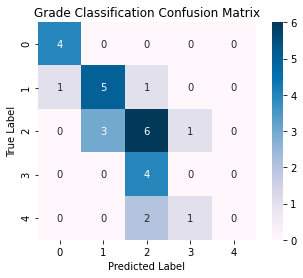

In [ ]:
# Heatmap
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Grade Classification Confusion Matrix')
plt.show()

### How good is the model?

There are five possible values for the student grade, so we would expect to be about 20% accurate using random chance. The KNN model (k = 2) has an accuracy of 53.57%, over 30% higher than random chance. Therefore, it seems like a fairly useful model.

### What is the model best at?

The model correctly identifies students who most students who are likely to earn A's and it identified 5 out of 7 students who ended up earning a B. Overall, the model seems to be more accurate at predicting higher grade values.


### What is the model worst at?

The model struggled to identify students who earned a C or lower. It only identified 6 out of 13 students who earned a C, and it did not correctly predict any student who earned a D or an F.